### **Mobile Price Range Multiclass classification**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv('E:/DL_6to8/repository/Multiclass_Classification/train_mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Basic Data Quality checks**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated().sum()

0

**Seperate X and Y (price_range)**

In [7]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]

In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


**Price range**
0. Low cost
1. Medium cost
2. High cost
3. Very High cost

In [10]:
Y.value_counts()

price_range
0              500
1              500
2              500
3              500
Name: count, dtype: int64

**Preprocess the data on X**

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


**Apply train test split**

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [16]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [17]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
353,-0.128653,-0.990050,-1.253064,-1.019184,0.619880,0.957886,-1.325520,-0.006069,-0.063548,1.521249,1.003414,-0.834197,-0.614489,0.404613,1.589078,2.579151,1.462493,0.559641,-1.006018,-1.014099
1333,1.669628,-0.990050,1.688833,-1.019184,1.080671,-1.043966,-0.994781,-0.352878,1.575296,1.084046,1.333295,-0.793626,-0.693176,-0.745267,-1.022389,-1.094526,-0.551204,0.559641,0.994018,-1.014099
905,-0.567980,1.010051,0.585621,-1.019184,-0.071307,-1.043966,-0.829411,-1.046495,0.727618,-0.664768,1.498235,-0.877022,0.329755,1.630107,1.351672,0.283103,1.462493,0.559641,0.994018,-1.014099
1289,-1.419319,1.010051,-1.253064,0.981177,0.619880,-1.043966,1.430640,-0.006069,-0.289595,0.209639,-0.316108,0.847234,1.635035,-0.201218,0.402047,-0.176107,-1.100394,0.559641,-1.006018,-1.014099


In [18]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [19]:
xtrain.shape

(1600, 20)

In [20]:
xtest.shape

(400, 20)

In [21]:
xtrain.shape[1]

20

**For Multiclass Classification one Hot Encode the target features**

In [22]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)

ytest_cat = to_categorical(ytest)

In [23]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [24]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [25]:
ytest_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [26]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [27]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

### **Build the Neural Network**

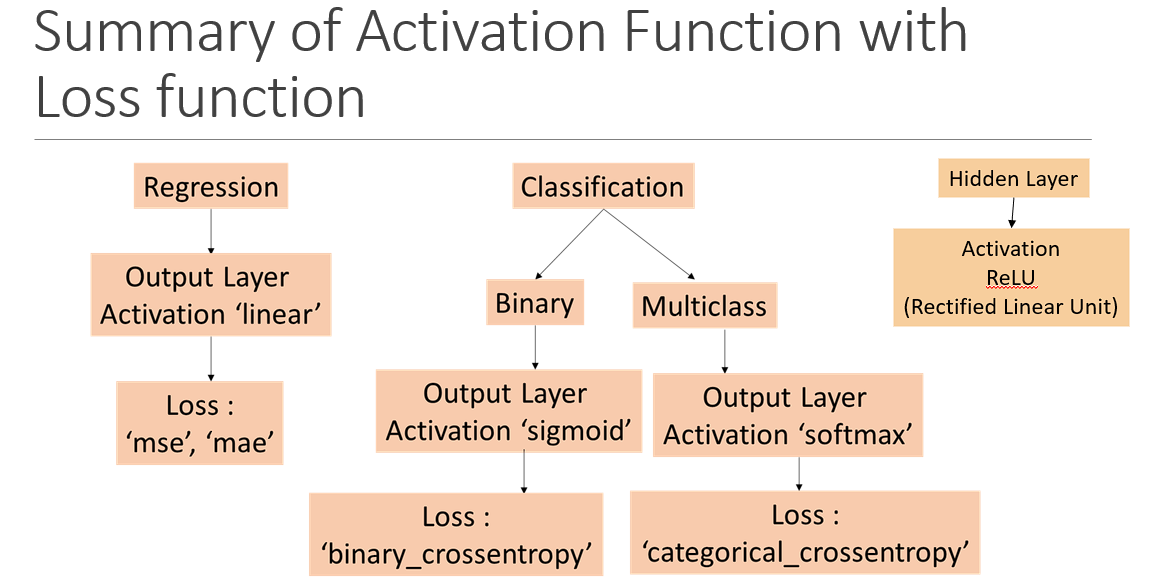

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [29]:
model = Sequential()

#Create Dense layer 1
model.add(Dense(units=64, activation='relu', input_shape=(xtrain.shape[1],)))
#Add dropout layer 1
model.add(Dropout(rate=0.3))
#Create Dense layer 2
model.add(Dense(units=32, activation='relu'))
#Output layer should have 4 neurons because there are 4 classses in this data
model.add(Dense(units=4, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compile the Model**

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Add early stopping**

In [32]:
es = EarlyStopping(monitor='val_loss', patience=10)

**Training the model**

In [33]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.2, epochs=200, callbacks=[es])

Epoch 1/200


40/40 [==============================] - 7s 20ms/step - loss: 1.3608 - accuracy: 0.3227 - val_loss: 1.2536 - val_accuracy: 0.4719
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 1.1914 - accuracy: 0.4820 - val_loss: 1.0917 - val_accuracy: 0.5688
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 1.0268 - accuracy: 0.5414 - val_loss: 0.9209 - val_accuracy: 0.6000
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.8643 - accuracy: 0.6461 - val_loss: 0.7776 - val_accuracy: 0.6750
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.6852 - val_loss: 0.6715 - val_accuracy: 0.7344
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.7453 - val_loss: 0.5809 - val_accuracy: 0.7781
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7711 - val_loss: 0.5101 - val_accuracy: 0.8188
Epoch 8/20

### **Plot the Learning Curve**

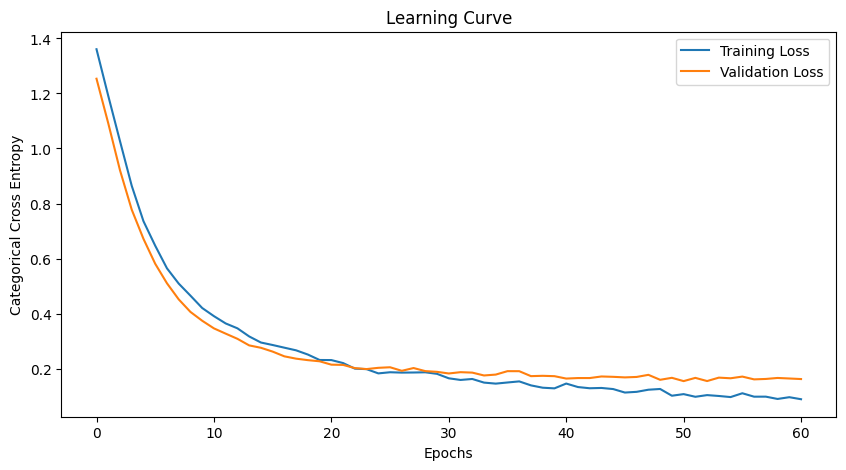

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

**Evaluate the model**

In [35]:
model.evaluate(xtrain, ytrain_cat)

50/50 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9800


[0.05825559049844742, 0.9800000190734863]

In [36]:
model.evaluate(xtest, ytest_cat)

13/13 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9200


[0.16711439192295074, 0.9200000166893005]

**Get probability for train and test**

In [37]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

13/13 [==============================] - 0s 1ms/step


In [38]:
yprob_train[0:5]

array([[5.3111567e-06, 9.1359419e-01, 8.6400531e-02, 8.4726182e-09],
       [6.7286774e-20, 2.0874641e-07, 8.1318134e-01, 1.8681848e-01],
       [8.9553797e-01, 1.0446207e-01, 3.1528204e-09, 1.6382362e-22],
       [1.3857603e-21, 4.3226325e-09, 1.2801747e-01, 8.7198251e-01],
       [4.8367794e-05, 9.9887592e-01, 1.0756525e-03, 4.8010294e-13]],
      dtype=float32)

In [39]:
yprob_test[0:5]

array([[9.93374169e-01, 6.62580971e-03, 2.19505497e-10, 9.52265869e-24],
       [3.03191916e-11, 8.41090642e-03, 9.91574705e-01, 1.43299321e-05],
       [6.04373345e-04, 9.97546732e-01, 1.84883142e-03, 6.35014665e-13],
       [5.74536500e-30, 2.32250742e-14, 3.55399854e-04, 9.99644637e-01],
       [3.27685557e-05, 9.85816598e-01, 1.41506325e-02, 1.03119235e-10]],
      dtype=float32)

**Get predictions out of probability**

In [40]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [41]:
ypred_train[0:5]

array([1, 2, 0, 3, 1], dtype=int64)

In [42]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [43]:
ypred_test[0:5]

array([0, 2, 1, 3, 1], dtype=int64)

In [44]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


### **Plot confusion matrix**

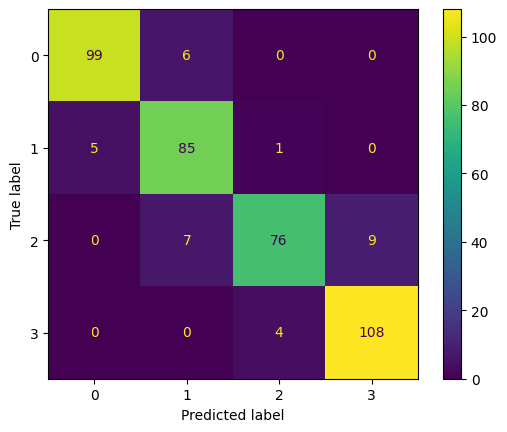

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

**Printing classification report**

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.87      0.93      0.90        91
           2       0.94      0.83      0.88        92
           3       0.92      0.96      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



--> Because f1_micro is 94% in test above is a very good model

**Predicting out of sample data**

In [48]:
xnew = pd.read_csv('E:/DL_6to8/repository/Multiclass_Classification/test_mobile.csv')
xnew

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [49]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


**Apply pre.transform on xnew**

In [50]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


**Get probabilities for xnew**

In [51]:
yprob = model.predict(xnew_pre)

32/32 [==============================] - 0s 1ms/step


In [52]:
yprob[0:5]

array([[9.4209086e-22, 1.5515965e-09, 7.4268833e-02, 9.2573112e-01],
       [1.7420718e-28, 1.0621163e-12, 6.6409423e-03, 9.9335903e-01],
       [4.0397924e-16, 9.4003390e-06, 8.4962451e-01, 1.5036604e-01],
       [1.9462966e-37, 2.7085175e-18, 2.6593356e-05, 9.9997342e-01],
       [4.2599370e-04, 9.9663299e-01, 2.9409942e-03, 9.2176884e-11]],
      dtype=float32)

**Get the predictions from probs**

In [53]:
ypred = np.argmax(yprob, axis=1)
ypred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 3, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 3, 3, 3, 2, 2, 1, 0, 0, 1, 3, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 0, 3, 3, 2, 3, 1, 3, 1, 2, 0, 2, 3, 1,

**Get maximum probability**

In [54]:
max_probs = np.max(yprob, axis=1)
max_probs[0:5]

array([0.9257311, 0.993359 , 0.8496245, 0.9999734, 0.996633 ],
      dtype=float32)

**Saving above results to dataframe**

In [55]:
df_final = xnew[['id']]
df_final

,id
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [56]:
df_final['price_range']=ypred
df_final['Probability']=max_probs

In [57]:
df_final

,id,price_range,Probability
0,1,3,0.925731
1,2,3,0.993359
2,3,2,0.849625
3,4,3,0.999973
4,5,1,0.996633
...,...,...,...
995,996,2,0.891298
996,997,1,0.999677
997,998,0,0.834714
998,999,2,0.954797


In [58]:
df_final['price_range'].value_counts()

price_range
3    264
0    258
2    249
1    229
Name: count, dtype: int64

**Save above file to csv**

In [59]:
df_final.to_csv('Result.csv', index=False)